## Importing Libraries

In [2]:
import sys
!{sys.executable} -m pip install dtaidistance
import pandas as pd
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dtaidistance import dtw
import scipy.stats as stats
from dtaidistance import dtw_visualisation as dtwvis

## Reading Data


In [3]:
ctl_clearnoon = pd.read_csv('Clearnoon/routes_fi_route_highway-0916_180909-data_fi_ghost_cutin-single_ctl.csv')
cvip_clearnoon= pd.read_csv('Clearnoon/routes_fi_route_highway-0916_180909-data_fi_ghost_cutin-single_cvip.csv')
traj_clearnoon= pd.read_csv('Clearnoon/routes_fi_route_highway-0916_180909-data_fi_ghost_cutin-single_traj.csv')


In [4]:
ctl_clearsunset= pd.read_csv('Clearsunset/routes_fi_route_highway-0916_181354-data_fi_ghost_cutin-single_ctl.csv')
cvip_clearsunset= pd.read_csv('Clearsunset/routes_fi_route_highway-0916_181354-data_fi_ghost_cutin-single_cvip.csv')
traj_clearsunset= pd.read_csv('Clearsunset/routes_fi_route_highway-0916_181354-data_fi_ghost_cutin-single_traj.csv')                                                                                    

In [5]:
ctl_hazenoon= pd.read_csv('Hazenoon/routes_fi_route_highway-0916_181558-data_fi_ghost_cutin-single_ctl.csv')
cvip_hazenoon= pd.read_csv('Hazenoon/routes_fi_route_highway-0916_181558-data_fi_ghost_cutin-single_cvip.csv')
traj_hazenoon= pd.read_csv('Hazenoon/routes_fi_route_highway-0916_181558-data_fi_ghost_cutin-single_traj.csv')

In [6]:
ctl_hazesunset= pd.read_csv('Hazesunset/routes_fi_route_highway-0916_181843-data_fi_ghost_cutin-single_ctl.csv')
cvip_hazesunset= pd.read_csv('Hazesunset/routes_fi_route_highway-0916_181843-data_fi_ghost_cutin-single_cvip.csv')
traj_hazesunset= pd.read_csv('Hazesunset/routes_fi_route_highway-0916_181843-data_fi_ghost_cutin-single_traj.csv')



In [7]:
ctl_rainnoon= pd.read_csv('Rainnoon/routes_fi_route_highway-0916_181152-data_fi_ghost_cutin-single_ctl.csv')
cvip_rainnoon= pd.read_csv('Rainnoon/routes_fi_route_highway-0916_181152-data_fi_ghost_cutin-single_cvip.csv')
traj_rainnoon= pd.read_csv('Rainnoon/routes_fi_route_highway-0916_181152-data_fi_ghost_cutin-single_traj.csv')

## Printing the first 5 rows of clear-night weather condition

In [8]:
ctl_clearnight = pd.read_csv ('Clearnight/routes_fi_route_highway-0916_182119-data_fi_ghost_cutin-single_ctl.csv')
ctl_clearnight.head()

,ts,agent_id,throttle,steer,brake
0,76995,0,0.9,0.006940,0.0
1,76996,0,0.9,-0.008241,0.0
2,76997,0,0.9,-0.003797,0.0
3,76998,0,0.9,-0.005603,0.0
4,76999,0,0.9,-0.001473,0.0


In [9]:
cvip_clearnight = pd.read_csv('Clearnight/routes_fi_route_highway-0916_182119-data_fi_ghost_cutin-single_cvip.csv')
cvip_clearnight.head()

,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z
0,76995,0,500.491189,198.767441,-95.832657,-499.819366
1,76996,0,5.595580,195.567444,-90.832657,0.100000
2,76997,0,5.592365,195.567444,-90.832657,0.095407
3,76998,0,5.589578,195.567444,-90.832657,0.084691
4,76999,0,5.587154,195.567444,-90.832657,0.069311


In [10]:
traj_clearnight = pd.read_csv ('Clearnight/routes_fi_route_highway-0916_182119-data_fi_ghost_cutin-single_traj.csv')
traj_clearnight.head()


,ts,agent_id,x,y,z,v
0,76995,0,192.362411,-86.26268,0.539326,0.0
1,76996,0,192.362411,-86.26268,0.491906,0.0
2,76997,0,192.362411,-86.26268,0.438374,0.0
3,76998,0,192.362411,-86.26268,0.378732,0.0
4,76999,0,192.362411,-86.26268,0.312981,0.0


## Creating a function game_time to compute the duration of the scene for each weather condition and save it in a dictonary dict_seconds

In [11]:
dict_seconds= {}
def game_time(x, weather):
    start_time= dt.datetime.fromtimestamp(x.iloc[0,0])
    end_time=dt.datetime.fromtimestamp(x.iloc[-1,0])
    print("Game time for "+ weather + " : " + str((end_time-start_time).total_seconds()),'seconds')
    dict_seconds[weather]=(end_time-start_time).total_seconds()
    

## Calling the function for each weather condition and printing the value

In [12]:
game_time(ctl_clearnight, "clearnight")
game_time(ctl_clearnoon, "clearnoon")
game_time(ctl_clearsunset, "clearsunset")
game_time(ctl_rainnoon, "rainnoon")
game_time(ctl_hazenoon, "hazenoon")
game_time(ctl_hazesunset, "hazesunset")



Game time for clearnight : 922.0 seconds
Game time for clearnoon : 751.0 seconds
Game time for clearsunset : 756.0 seconds
Game time for rainnoon : 750.0 seconds
Game time for hazenoon : 794.0 seconds
Game time for hazesunset : 774.0 seconds


In [13]:
dict_seconds

{'clearnight': 922.0,
 'clearnoon': 751.0,
 'clearsunset': 756.0,
 'rainnoon': 750.0,
 'hazenoon': 794.0,
 'hazesunset': 774.0}

## Our next task is to summarise the mean and the standard deviation of each feature for different weather conditions in a table. We do this by creating a function merged_df and then follow these steps:
1. Merge all the csv files for each weather condition and then select the required features.
2. Create an empty list and then run a for loop through each column of that particular weather conditon.
3. Find the mean and standard deviation value for each column and append it in the created list in the format mean(standard deviation)
4. Return this list for each weather condition.


In [14]:

def merged_df(df1, df2, df3): 
    merged_df = pd.merge((pd.merge(df1, df2, on=["ts", "agent_id"])), df3, on = ["ts", "agent_id"])
    merged_df1 = merged_df[['throttle','steer','brake','cvip','x','y','v']] 
    clear = []
    for i in range(len(merged_df1.columns)):
        clear.append(str(round(merged_df1.iloc[:, [i]].mean()[0], 4)) + ' (' + str(round(merged_df1.iloc[:, [i]].std()[0],4)) + ')')
    return clear, merged_df1

5. Create a dataframe to store the returned list to form a table as shown below
6. We also store a seprate dataframe for each weather condition for future use.

In [15]:
final_df = pd.DataFrame(columns=['clear-night', 'clear-sunset', 'clear-noon', 'rain-noon'], 
                       index=['throttle','steer','brake','cvip','x','y','v'])

In [16]:
final_df['clear-night'], df_clearnight = merged_df(ctl_clearnight,cvip_clearnight,traj_clearnight)
final_df['clear-sunset'], df_clearsunset = merged_df(ctl_clearsunset,cvip_clearsunset,traj_clearsunset)
final_df['clear-noon'], df_clearnoon = merged_df(ctl_clearnoon,cvip_clearnoon,traj_clearnoon)
final_df['rain-noon'], df_rainnoon = merged_df(ctl_rainnoon,cvip_rainnoon,traj_rainnoon)

In [17]:
final_df

,clear-night,clear-sunset,clear-noon,rain-noon
throttle,0.6122 (0.3432),0.6104 (0.2814),0.608 (0.2827),0.6119 (0.2834)
steer,0.0042 (0.0626),0.0003 (0.0055),0.0005 (0.0059),-0.0 (0.004)
brake,0.1235 (0.3292),0.0568 (0.2316),0.0559 (0.2298),0.0586 (0.235)
cvip,39.0021 (38.341),20.0378 (24.6228),19.4486 (24.2456),19.2277 (24.1573)
x,189.7718 (2.8529),192.9395 (0.3978),192.9154 (0.4031),192.9746 (0.4179)
y,-25.6591 (40.3905),-31.2123 (40.4284),-31.399 (40.516),-31.2587 (40.5638)
v,5.6908 (2.5713),6.8853 (3.3099),6.9269 (3.2839),6.9426 (3.3021)


## Plotting the feature vs time plot for each weather condition using plt.plot

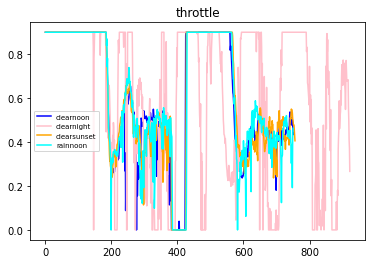

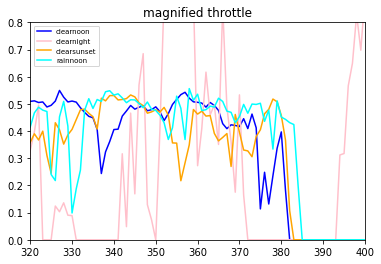

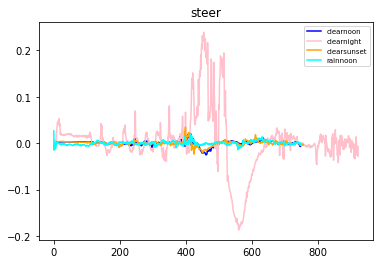

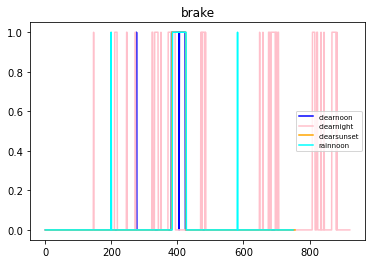

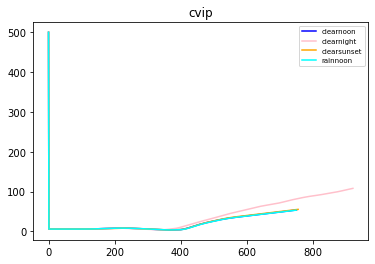

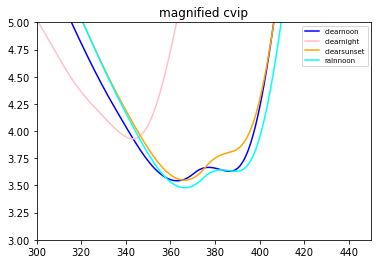

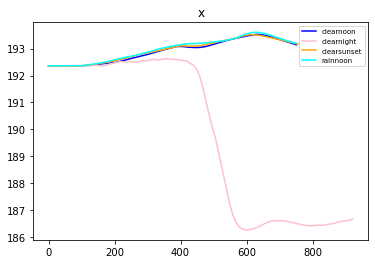

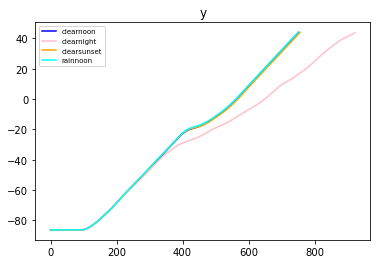

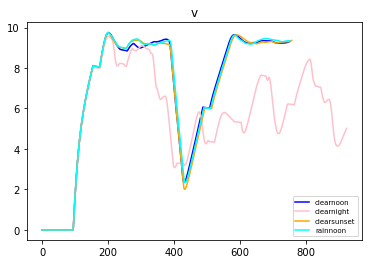

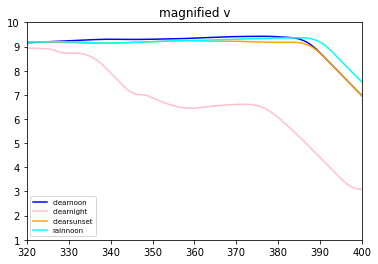

In [18]:
def plots(feat):
    plt.plot((list(range(int(dict_seconds['clearnoon'])+1))),df_clearnoon[feat], color ="blue",label='clearnoon')
    plt.plot((list(range(int(dict_seconds['clearnight'])+1))),df_clearnight[feat], color="pink",label='clearnight')
    plt.plot((list(range(int(dict_seconds['clearsunset'])+1))),df_clearsunset[feat],color="orange",label='clearsunset')
    plt.plot((list(range(int(dict_seconds['rainnoon'])+1))),df_rainnoon[feat],color="cyan",label='rainnoon')
    plt.title(feat)
    plt.legend(fontsize=7)
    plt.show()
    if feat=='cvip':
        plt.plot((list(range(int(dict_seconds['clearnoon'])+1))),df_clearnoon[feat], color ="blue",label='clearnoon')
        plt.plot((list(range(int(dict_seconds['clearnight'])+1))),df_clearnight[feat], color="pink",label='clearnight')
        plt.plot((list(range(int(dict_seconds['clearsunset'])+1))),df_clearsunset[feat],color="orange",label='clearsunset')
        plt.plot((list(range(int(dict_seconds['rainnoon'])+1))),df_rainnoon[feat],color="cyan",label='rainnoon')
        plt.title('magnified cvip')
        plt.xlim(300,450)
        plt.ylim(3,5)
        plt.legend(fontsize=7)
        plt.show()
    if feat=='v':
        plt.plot((list(range(int(dict_seconds['clearnoon'])+1))),df_clearnoon[feat], color ="blue",label='clearnoon')
        plt.plot((list(range(int(dict_seconds['clearnight'])+1))),df_clearnight[feat], color="pink",label='clearnight')
        plt.plot((list(range(int(dict_seconds['clearsunset'])+1))),df_clearsunset[feat],color="orange",label='clearsunset')
        plt.plot((list(range(int(dict_seconds['rainnoon'])+1))),df_rainnoon[feat],color="cyan",label='rainnoon')
        plt.title('magnified v')
        plt.xlim(320,400)
        plt.ylim(1,10)
        plt.legend(fontsize=7)
        plt.show()
    if feat=='throttle':
        plt.plot((list(range(int(dict_seconds['clearnoon'])+1))),df_clearnoon[feat], color ="blue",label='clearnoon')
        plt.plot((list(range(int(dict_seconds['clearnight'])+1))),df_clearnight[feat], color="pink",label='clearnight')
        plt.plot((list(range(int(dict_seconds['clearsunset'])+1))),df_clearsunset[feat],color="orange",label='clearsunset')
        plt.plot((list(range(int(dict_seconds['rainnoon'])+1))),df_rainnoon[feat],color="cyan",label='rainnoon')
        plt.title('magnified throttle')
        plt.xlim(320,400)
        plt.ylim(0,0.8)
        plt.legend(fontsize=7)
        plt.show()
feat_list=['throttle','steer','brake','cvip','x','y','v']
for i in feat_list:
    plots(i)

## Inference from the plots

Based on our life experiences and intuition, we feel that the features that will change during the course of an accident are acceleration(throttle), steer, brake, speed(v), distance of the AV with respect to the eagle vehicle(cvip), and the horizontal direction(x) of the AV. 
Brakes of the AV arent applied at the right time due to which the velocity and acceleration dont reduce significantly leading to an accident. 

Looking at the magnified cvip plot, we can infer the following things:-
From the plot of cvip, we can see that the eagle vehicle comes the closest to the AV for all the weather conditions between 350-400 seconds. Our next task would be to observe various other features in that timeframe of 350-400 seconds where we believe that a near-accident takes place. Hence, we first magnify the plots for these faetures in the range where the EV was closest to the AV i.e. 350-400

Using the above information regarding the time-frame of the accident, we observe that a near-accident takes place between 350-400 seconds for Rain-Noon, Clear-Noon, Clear-Sunset weather conditions. 

We inferred this because the magnified plots of Velocity, CVIP, acceleration and brake indicate that when the eagle vehicle was very close to the AV, the AV failed to apply brakes at the right time due to which the velocity of the AV was not low enough which inturn lead to a near-accident where as if we see the magnified plots for clear night we can conclude that when the EV was very close to AV(cvip=360), the AV applied brakes due to which the acceleration decreased which reduce the velocity of AV and hence there was no sign of accident with the EV 


## Task 2- Abnormality in the AV behaviour

We observe some abnormality in the horizontal position of the vehicle. We believe that this is caused due to irregular movement of the steering of the AV as evident from the steer and x plots.
Also, from the simulation we can see that when the EV comes close, the AV reacts to it by changing the lane i.e. moving to the right. During this process the AV system fails and hence it doesn't stop after moving sufficiently far away from the EV and eventually almost crashes to the extreme end of fencing.

Assumption: The cause of abnormal behavious is the irregularity in the movement of the sterring

## Plotting the density plot of each feature to understand the abnormal vs normal runs in the corresponding weather conditions

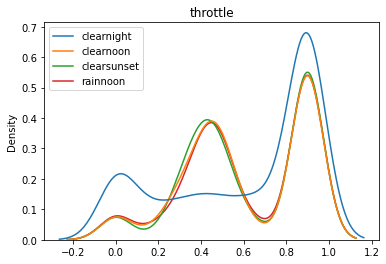

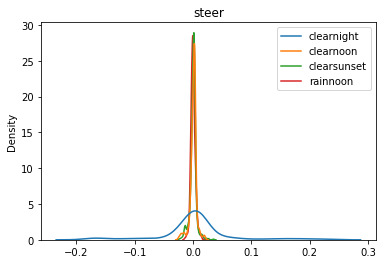

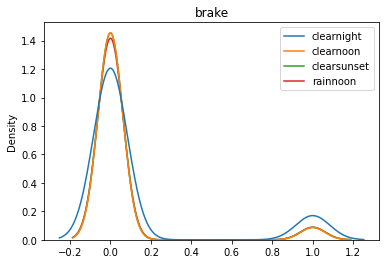

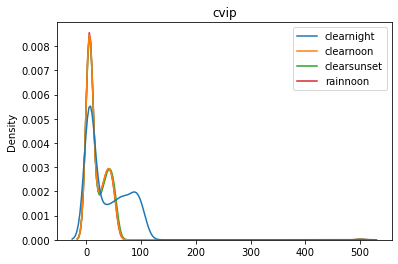

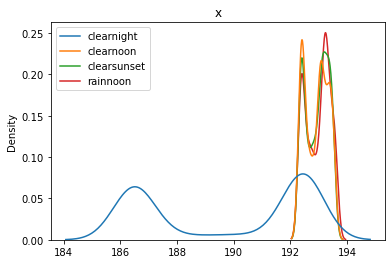

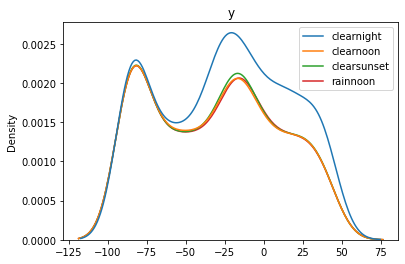

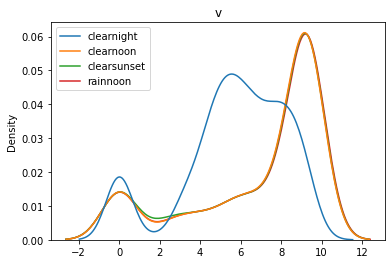

In [19]:
#we define a function that plots the density curve for each feature.
def feature_plot(feature):
            df_feature= pd.DataFrame({'clearnight':df_clearnight[feature],'clearnoon':df_clearnoon[feature],'clearsunset':df_clearsunset[feature],'rainnoon':df_rainnoon[feature]})
            plt.figure()
            plt.title(feature)
            sns.kdeplot(data=df_feature)
feat_list=['throttle','steer','brake','cvip','x','y','v']
for i in feat_list:
    feature_plot(i)

## Hypothesis Testing using Two sample T-Test 

Sample 1 - Steer feature of Abnormal weather conditions

Sample 2 - Steer feature of Normal weather conditions 

Null Hypothesis(H0): μ1 = μ2, (the two samples have the same means)

Alternat Hypothesis(Ha): μ1 ≠ μ2, (the two samples have different means)

In [20]:
print(np.var(df_clearnight['steer'])/np.var(df_rainnoon['steer'])) 
print(np.var(df_clearnight['steer'])/np.var(df_clearsunset['steer'])) 
print(np.var(df_clearnight['steer'])/np.var(df_clearnoon['steer'])) 

243.45013695476052
129.55643562748327
113.31184828142884


Since the the ratio of the variances of the abnormal by the normal weather condition is very large in each case, we conduct the Welch's Two sample T Test for unequal variances by taking equal_var=False in the below function.

Using stats.ttest_ind function to get the test statistics and p-value

In [21]:
print('Clearnight-Rainnoon:',stats.ttest_ind(a=df_clearnight['steer'],b=df_rainnoon['steer'], equal_var=False))
print('Clearnight-Clearsunset',stats.ttest_ind(a=df_clearnight['steer'],b=df_clearsunset['steer'], equal_var=False))
print('Clearnight-Clearnoon',stats.ttest_ind(a=df_clearnight['steer'],b=df_clearnoon['steer'], equal_var=False))

Clearnight-Rainnoon: Ttest_indResult(statistic=2.0446791315043384, pvalue=0.04116720384761283)
Clearnight-Clearsunset Ttest_indResult(statistic=1.9069545075863854, pvalue=0.056831311585982265)
Clearnight-Clearnoon Ttest_indResult(statistic=1.7900340406174708, pvalue=0.07376954318906959)


The result indicates the test statistics on the left and the p-value on the right. 

Making a decision using the test statistics and p-value:

We know from the t-value chart for a two-sample t-test, the critical t-value with 0.05 sinificance level and the degrees of freedom of our sample should be 1.962. Which also means that to reject the null hypothesis our test statistic value should be greater that 1.962 or the p-value should be less than 0.5.

As seen above, we can only reject the null hypothesis in the case of rainnoon. In the cases of clearsunset and clearnoon, we cannot reject the null hypothesis since the pvalues > 0.05 and test statistic<1.962.


The two sample T-Tests does not explain the abnormality in the clear-night weather condition wrt to other weather conditions very well as it bases its hypothesis on the mean of the sample datasets rather than the standard deviation. Hence, we cant use them to verify our plot inferences.

# Inference from the plots

After looking at the plots, we observe that the best indicators of abnormal behaviour in Clear-Night weather condition are "Steer" , "x", "cvip", due to stark differences in the distribution plots.

"Steer": The plots make it clear that the steer of the AV during the Clear-Night condition majorly lies within a range of -0.05 to 0.05. it also implies that the vehicle was constantly being steered from side to the other indicating less stability. This denotes abnormality. In other weather conditions, the steer is concentrated in a short range at either side of 0, indicating that it was majorly following a straight path and not changing lanes rapidly. 

"X":  X can be interpreted in the same way as "Steer". The plots denote rapid change of lanes( at positions 192.25 to 192.75 units) during the clear-night weather. This is an indication of abnormality of the AV.

'cvip': As the distance between the eagle vehicle and AV reduces, we observe that the AV starts steering towards extreme right side of the road.
 

## Calculating the Pearson correlation coefficient between each pair of the indicator using np.corrcoef


Pearson Correlation: [[1.         0.35327235]
 [0.35327235 1.        ]]


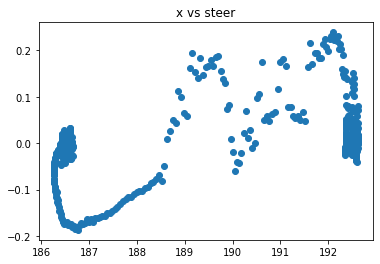

Pearson Correlation: [[ 1.        -0.8470917]
 [-0.8470917  1.       ]]


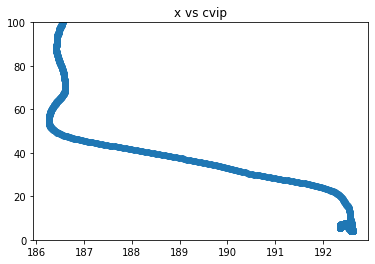

Pearson Correlation: [[ 1.         -0.16236199]
 [-0.16236199  1.        ]]


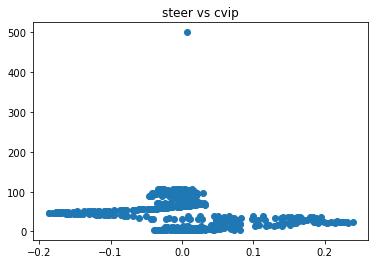

In [22]:
my_rho = np.corrcoef(df_clearnight['x'],df_clearnight['steer'] )
print("Pearson Correlation:",my_rho)
plt.scatter(df_clearnight['x'],df_clearnight['steer'])
plt.title('x vs steer')
plt.show()

my_rho = np.corrcoef(df_clearnight['x'],df_clearnight['cvip'] )
print("Pearson Correlation:",my_rho)
plt.title('x vs cvip')
plt.scatter(df_clearnight['x'],df_clearnight['cvip'])
plt.ylim(0,100)
plt.show()

my_rho = np.corrcoef(df_clearnight['steer'],df_clearnight['cvip'] )
print("Pearson Correlation:",my_rho)
plt.scatter(df_clearnight['steer'],df_clearnight['cvip'])
plt.title('steer vs cvip')
plt.show()

We are trying to observe whether a feature can predict abnormality of the AV.

Due to the high negative correlation between x and cvip, one of them will be sufficient to predict the abnormality in the weather condition. 

Due to only mild correlation between steer and x, and steer and cvip, we would use both the variables for a good prediction.

Finally, out of all the best indicators, we can choose cvip and x, or cvip and steer for prediction. However, this is just an observation. We can use various feature selection methods to accept/modify this observation.

# Performing the Kolmogorov–Smirnov two-sample test to verify if the chosen features are  indeed a good indicator of abnormal AV behavior

Null hypothesis(H0): The data from feature comes from the same distribution where there is no abnormality

Alternate hypothesis(H1): Atleast one datapoint from feature does not come from the same distribution indicating abnormality

Now, we perfrom the KS two-sample test on the selected features using stats.kstest function

In [23]:
print('Clearnight - Rainnoon')
print('Steer -',stats.kstest(df_clearnight['steer'],df_rainnoon['steer']))
print('cvip -',stats.kstest(df_clearnight['cvip'],df_rainnoon['cvip']))
print('x -',stats.kstest(df_clearnight['x'],df_rainnoon['x']))

print('Clearnight - Clearsunset')
print('Steer -',stats.kstest(df_clearnight['steer'],df_clearsunset['steer']))
print('cvip -',stats.kstest(df_clearnight['cvip'],df_clearsunset['cvip']))
print('x -',stats.kstest(df_clearnight['x'],df_clearsunset['x']))

print('Clearnight - Clearnoon')
print('Steer -',stats.kstest(df_clearnight['steer'],df_clearnoon['steer']))
print('cvip -',stats.kstest(df_clearnight['cvip'],df_clearnoon['cvip']))
print('x  -',stats.kstest(df_clearnight['x'],df_clearnoon['x']))

Clearnight - Rainnoon
Steer - KstestResult(statistic=0.40412422295732814, pvalue=5.2638987101897974e-61)
cvip - KstestResult(statistic=0.3572816598453777, pvalue=1.7548138851983438e-47)
x - KstestResult(statistic=0.715046604527297, pvalue=9.160404621919638e-205)
Clearnight - Clearsunset
Steer - KstestResult(statistic=0.4040511742336961, pvalue=3.0008992702717665e-61)
cvip - KstestResult(statistic=0.3464579776187866, pvalue=8.27237752628922e-45)
x - KstestResult(statistic=0.7014531043593131, pvalue=5.499664029632177e-197)
Clearnight - Clearnoon
Steer - KstestResult(statistic=0.3971179779165994, pvalue=6.569407736204636e-59)
cvip - KstestResult(statistic=0.35511658329683504, pvalue=6.210016713651148e-47)
x  - KstestResult(statistic=0.6715425531914894, pvalue=4.0484017167265404e-178)


As the pvalue <<<0.05 for all the normal weather condition vs abnormal weather conditions, we reject the Null Hypothesis in all cases concluding that both samples have different distributions in all the cases, and hence we have chosen the best-fit indicators.

# Two sample KS test for an unselected field ('v','brake')

In [24]:
print('Rainnoon & Clearnight for v')
print(stats.kstest(df_clearnight['v'],df_rainnoon['v']))

print('Rainnoon & Clearnight for brake')
print(stats.kstest(df_clearnight['brake'],df_rainnoon['brake']))

Rainnoon & Clearnight for v
KstestResult(statistic=0.4661289461649545, pvalue=7.891081206323335e-82)
Rainnoon & Clearnight for brake
KstestResult(statistic=0.06492174392251285, pvalue=0.05757121423925388)


In this case, we have chosen 'v' and 'brake'  as an unselected field to perform the two sample KV test.
As the p-value<<0.05 for 'v',the Null Hypothesis can be rejected. This imples that the velocity can be a good indicator of abnormality. Hence, we can include it in our list of best indicators.
On the other hand, for the 'brake' we have p>0.05. Hence we fail to reject the null hypothesis which means that break is not a good indicator of abnormality

## Difference between t-test and ks-test

The major difference between both the tests is that the t-test is used to compare only the means of two groups whereas the KS-test compares the whole cumulative distribution function including the variance and determines if they are similar or not.

To perform the t-test the samples must be normal. On the other hand in the KS test there is no such limitation.

Like in our case we had samples of each weather condition with near about similar means. So in this case the t-test failed to give us information about the weather condition in which the AV behaves abnormally as it didnt consider the variability but just the mean. Whereas, the KV test was able to take into account this variability

# Assumption while selecting the best subset using KS test and an example of its failure

Assumption: Assumption made about Best indicator selection using the KS test is that we get the best subset in just one simulation. However, multiple runs of the simulation might bring us to a different selection of best indicators for abnormality.

Consider a case when irregular apllication of the brakes lead to abnormality. In this case, the brake would contirbute significantly to the abnormality in the AV.

We would observe a pvalue <0.05 for the brake feature, and our best indicator selection would be incorrect, which contradicts our assumption.

# Dynamic-time-warping (DTW)

Distance between clearnight &  clearnoon : 1.609010891369342
Distance between clearsunset &  clearnoon : 0.060543132640834954


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

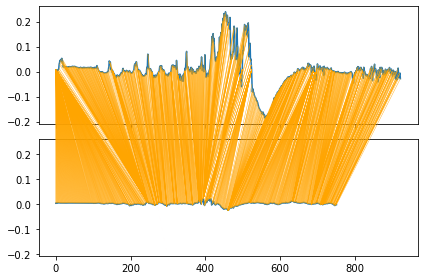

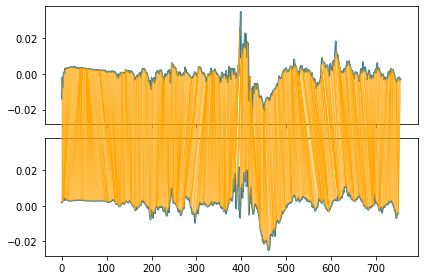

In [25]:
s_clearnight=ctl_clearnight['steer']
s_reference=ctl_clearnoon['steer']
s_sunset=ctl_clearsunset['steer']

distance1 = dtw.distance(s_clearnight, s_reference)
print("Distance between clearnight &  clearnoon :",distance1)
distance2 = dtw.distance(s_sunset, s_reference)
print("Distance between clearsunset &  clearnoon :",distance2)
path1=dtw.warping_path(s_clearnight, s_reference)
path2=dtw.warping_path(s_sunset, s_reference)
dtwvis.plot_warping(s_clearnight,s_reference , path1)
dtwvis.plot_warping(s_sunset,s_reference , path2)


From the above visualizations and statistics, we can verify that the distance between two normal weather conditions' distribution is less and the distance between normal & abnormal weather conditions' distributions is more. This is correctly indicative of the fact that the two normal weather distributions are similar.

## Task 3 – Probabilistic Analysis of AV Disengagement 

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [27]:
data = pd.read_csv('mp1_av_disengagements.csv',sep=',')

In [28]:
data.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


#### The assumption of at most one disengagement per mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a _________________ distribution. (1 point)

The assumption of at most one disengagement per mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a bernoulli distribution

##### Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.

DPM= Disengagement per miles
Clo= Cloudy Weather 
Cle= Clear Weather
Using Bayes Conditional Probability,

P( DPM | Col )= P( Col | DPM ) * P( DPM ) / P( Col )

In [428]:
#finding the probability of disengagement per mile
n_miles= 505229
diseng_pmile= len(data)/n_miles

#finding the probability that the weather is coludy when there is a disengagement
p_clo_dis= sum(data['Weather']=='cloudy')/len(data)

#we have been given that the probability of day being clear in California is 72%.
# So probability of cloudy weather will be
p_clo= 1-0.72

#probability of disengagement per mile on a cloudy day
p_dis_clo= (p_clo_dis*diseng_pmile)/p_clo
p_dis_clo

0.00590255677552725

#### Based on the above assumptions, calculate the probability of disengagement per mile on a clear day. 

P( DPM | Cle )= P( Cle | DPM ) * P( DPM ) / P( Cle )

In [429]:
#finding the probability that the weather is clear when there is a disengagement
p_cle_dis= sum(data['Weather']=='clear')/len(data)
p_cle_dis

#we have been given that the probability of day being clear in California is 72%.
p_cle= 0.72

#probability of disengagement per mile on a clear day.
p_dis_cle= (p_cle_dis*diseng_pmile)/p_cle
p_dis_cle

0.0005195663748517999

#### Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day. (1 point)

In [431]:
#finding the probability that the disengagement is automatic and the weather is cloudy
autode= data[data['TypeOfTrigger']=='automatic']
p_autode1= sum(autode['Weather']=='cloudy')/len(data[data['Weather']=='cloudy'])
p_autode1

#finding the probability of an automatic disengagement per mile on a cloudy day
p_autode_clo=p_autode1*p_dis_clo
p_autode_clo

0.0028063653172267283

In [430]:
#finding the probability that the disengagement is automatic and the weather is clear
p_autode2= sum(autode['Weather']=='clear')/len(data[data['Weather']=='clear'])
p_autode2

#finding the probability of an automatic disengagement per mile on a clear day
p_autode_cle= p_autode2*p_dis_cle
p_autode_cle

0.00026390673008345393

#### How likely is it that, under cloudy conditions, in 10,000 miles, there are 100 or more disengagements? (hint: use Central Limit Theorem)(2 points)

We solve this problem using Central limit theorem.

This is because according to the definition of central limit theorem, the binomial distribution of disengagements under cloudy conditions approaches a normal distribution as the number of miles gets larger which 
is 100000 in our case. 

Here,

X= Random variable of disengagement on a cloudy day

n= number of miles= 10000

p= probability of disengagement per mile on a cloudy day= 0.0059

q= probability of no disengagement per mile on a cloudy day = 1-p = 0.00941

b= Given Limit= 100 or more disengagements

s= Distribution standard deviation= sqrt(npq)

In [255]:
s = np.sqrt(10000*p_dis_clo*(1-p_dis_clo))
s

7.660102218011799

m= Distribution mean 

In [256]:
m = 10000*p_dis_clo
m

59.0255677552725

In this problem, to find the probability of 100 or more disengagements in 10000 miles, that is P(X>=100)

To compute this we find the Z value using the formula-
Z= (b-m)/s


In [258]:
b= 100
Z= (b-m)/s
Z

5.349071210614018

This indicates that we are 5.35 standard deviations away from the mean.
Now we find the area under the normal curve corresponding to this z-value we will get the required probability.

We use scipy.stats.norm.sf() function for calculating p-value from z-score which will give the required probability P(X>=100).

In [262]:
stats.norm.sf(Z)

4.4203376990669085e-08

Therefore, the probability that there are 100 or more disengagements is nearly equal to zero

#### Assuming that the disengagement per mile is a random variable with the distribution you answered in Task 3.1.a, and the weather condition is cloudy. 

#### A] What is the distribution of miles to the next disengagement? Explain your reasoning. Calculate and state the values of the parameters of the distribution. (1 points)

Distribution Type : Geometric

Our data is binary, meaning that there can either beone disengagement orno disengagements in a mile. Further, we are 

required to find the fixed number of disengagements and count the number of miles to get to the first disengagement, 

which follows a geometric distribution pattern. This process continues for N independent trials where N is the number 

of disengagements.

Parameters:

PMF = f(x) = ((1-p)^(x-1))*p

where p = P(DPM|weather=cloudy)=0.0059

DPM: Disengagement per mile

#### B] What is the distribution of the number of disengagements in 10,000 miles? (hint: this is equivalent to drawing n=10,000 independent trials from the distribution of disengagement per mile you calculated from Task 3.1.a) Calculate and state the values of the parameters of the distribution. (1 points)

The distribution in this case will be binomial distribution as it represents the number of disengagements in 10000 miles or 10000 Bernoulli trails.  

In [157]:
p_bino= p_dis_clo
p_bino

0.00590255677552725

In [159]:
q_bino= 1-p_bino
q_bino

0.9940974432244728

In [ ]:
#Suppose we have to find a proba

n= number of miles= 10000

p_bino= probability of disengagement per mile on a cloudy day = 0.0059

q_bino= probability of no disengagement per mile on a cloudy day = 1-p = 0.00941  

k= number disengagements within n miles

nCk= number of combinations

Probability mass function= nCk * (p)^k * (q)^n-k

#### C] Notice that the n in Task 3.2.b is large while the probability p of disengagement per mile is very small, what distribution does the your answer in Task 3.2.b approximate? Calculate and state the values of the parameters of the distribution. (1 points)

The answer in the above task i.e. binomial distribution approximates to a nomrmal distribution as n goes to 10000. 

In [203]:
mean_norm = 10000*p_dis_clo
mean_norm

59.0255677552725

In [204]:
sd_norm = np.sqrt(10000*p_dis_clo*(1-p_dis_clo))
sd_norm

7.660102218011799

Parameters of the resulting normal distribution:
mean_norm = Distribution mean = n*p_bino = 59.0256
sd_norm = Distribution standard deviation= sqrt(n*p_bino*q_bino)= 7.6601

#### D] Plot the probability mass function (PMF) of the distribution in Task 3.2.b and Task 3.2.c. What do the 2 plots look like? (1 point)

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


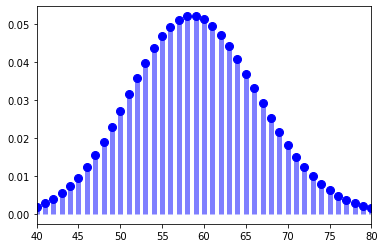

In [211]:
# PMF plot of binomial distribution from Task 3.2.b 

# defining the possible values of k number of disengagements within n miles
k_values= list(range(n + 1))
# list of pmf values
dist = [binom.pmf(k, n, p_bino) for k in k_values ]
# plotting the PMF values

plt.plot(k_values , dist , 'bo', ms=8, label='binom pmf')
plt.xlim(40,80)
plt.vlines(k_values, 0, dist, colors='b', lw=5, alpha=0.5)

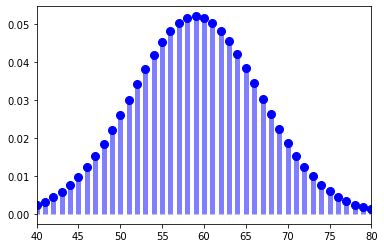

In [253]:
# PDF plot of normal distribution from Task 3.2.c
x_axis = list(range(10000))
# list of pmf values
dist2= norm.pdf(x_axis, mean_norm, sd_norm)
plt.plot(x_axis, dist2,'bo', ms=8, label='binom pmf')
plt.xlim(40,80)
plt.vlines(x_axis, 0,dist2, colors='b', lw=5, alpha=0.5)




Both plots have a bell shaped curve around the value 59 which indicates that the Binomal distribution is behaving exactly like the normal distribution.

#### E] Solve Task 3.1.e by using the cumulative distribution function (CDF) of the distribution you computed in Task 3.2.c and compare the results. Discuss your findings. (1 points)


In [263]:
#In this problem, to find the probability of 100 or more disengagements in 10000 miles, 
#we find the cdf till X value of 100 and then subtract it by 1 to find the required probability.
n_dist= stats.norm(mean_norm,sd_norm)
prob = 1-n_dist.cdf(100)
prob

4.420337695876242e-08

The results match exactly with the one we calculated in 3.1e.

#### What’s the conditional probability that the reaction time is: (Hint, there might be multiple conditions to consider) (4 points)

#### A] Greater than 0.4s given that the weather was cloudy? Reaction time is measured only in cases where there was an automatic disengagement. (2 points)

In [336]:
#finding the probability that the reaction time is greater than 0.4s given that weather is coludy
autode= data[data['TypeOfTrigger']=='automatic']
rect1 = autode[autode['ReactionTime']>0.4]
p_rect1_clo= sum(rect1['Weather']=='cloudy')/sum(autode['Weather']=='cloudy')
p_rect1_clo



0.6120906801007556

#### B] Greater than 0.7s given that the weather was clear? Reaction time is measured only in cases where there was an automatic disengagement. (2 points)


In [337]:
#finding the probability that the reaction time is greater than 0.7s given that weather is clear
rect2= autode[autode['ReactionTime']>0.7]
p_rect1_cle= sum(rect2['Weather']=='clear')/sum(autode['Weather']=='clear')
p_rect1_cle




0.3854166666666667

#### A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.4s under cloudy conditions and, (ii) a reaction time greater than 0.7s under clear conditions. Find the probability of an accident per mile due to automatic AV disengagement and slow reaction. (2 points)


$$P(Accident/mile(Auto)) = P(Slow(Clo)|Clo, DPM)P(DPM|Clo)P(Clo) + P(Slow(Cle)|Cle, DPM)P(DPM|Cle)P(Cle))$$

In [338]:
#Finding the probability of an accident per mile due to automatic AV disengagement and slow reaction

p_acc_auto= p_rect1_clo*p_autode_clo*p_clo + p_rect1_cle*p_autode_cle*p_cle

p_acc_auto 

0.0005542041331752531

#### Next, you will investigate how to diagnose the cause of an AV disengagement based on new observations. (3 points)

#### a. An AV had a disengagement with a reaction time greater than 0.4s on a cloudy day. What is the posterior probability that the root cause of the disengagement was “Software Froze”? (2 points)

Posterior probability = P(SF|RT>0.4,Cloudy day) 

In [363]:
#probability that the root cause of the disengagement was “Software Froze” provided that the AV had a disengagement with a reaction time greater than 0.4s on a cloudy day.
rect1_clo= rect1[rect1['Weather']=='cloudy']
softf_clo= sum(rect1_clo['Cause']=='Software Froze')

p_post_sf_clo = softf_clo/len(rect1_clo)
p_post_sf_clo



0.053497942386831275

Posterior probability = P(SF|RT>0.7,Clear day) 

In [362]:
#probability that the root cause of the disengagement was “Software Froze” provided that the AV had a disengagement with a reaction time greater than 0.7s on a clear day.
rect2_cle= rect2[rect2['Weather']=='clear']
softf_cle= sum(rect2_cle['Cause']=='Software Froze')
p_post_sf_cle = softf_cle/len(rect2_cle)
p_post_sf_cle


0.24324324324324326

We conclude that the probability of an accident due to a disengagment of Software Froze is higher in clear weather than in cloudy weather.

In [432]:
import pandas as pd

In [434]:
df_json = pd.read_csv('part3b_data.csv')
df_json.head(150)

,Unnamed: 0,weather,scenario,status
0,0,clear-noon,ghost_cutin,Completed
1,1,cloudy-noon,ghost_cutin,Completed
2,2,rain-noon,ghost_cutin,Completed
3,3,snow-noon,ghost_cutin,Completed
4,4,clear-noon,ghost_cutin,Completed
...,...,...,...,...
145,145,cloudy-noon,ghost_cutin,Completed
146,146,rain-noon,ghost_cutin,Failed -- Accident
147,147,snow-noon,ghost_cutin,Completed
148,148,clear-noon,ghost_cutin,Completed


#### Parse the provided Carla simulation dataset and calculate the following probabilities for the cut-in scenario (you need to filter our invalid data points before doing the analysis:


#### a. The probability of accident P(acc=1) across all weather conditions.(1 point)

In [435]:
acc_total=sum(df_json['status']=='Failed -- Accident')
total=len(df_json)
p_acc=acc_total/total
print(p_acc)

0.089


#### b. The probability of accident conditioned on the weather, P(acc=1 | weather=?), for each weather condition.(1 point)


In [437]:
weathers_list=['rain-noon','clear-noon','snow-noon','cloudy-noon']
cond_acc=[] ## stores all accident conditional probabilties for all weathers
for i in weathers_list:
    total=len(df_json[(df_json['weather']==i) & (df_json['status']!='Failed -- Simulator crashed')])
    print("Total",total)
    accident=len(df_json[(df_json['weather']==i) & (df_json['status']=='Failed -- Accident')])
    print("Accidents",accident)
    prob_acc=accident/total
    cond_acc.append(prob_acc)
    print(i,":", prob_acc)

Total 497
Accidents 62
rain-noon : 0.12474849094567404
Total 492
Accidents 4
clear-noon : 0.008130081300813009
Total 497
Accidents 91
snow-noon : 0.18309859154929578
Total 494
Accidents 21
cloudy-noon : 0.04251012145748988


#### 2. The baseline simulated dataset contains the accident information under snowy conditions and under rainy conditions. In California it is sunny 72% of the time, rainy 10% of the time, snowy 3% of the time and the rest of the time it is cloudy. In Chicago, it is sunny 56% of the time, it rains 25% and it is snowy 9% of the time, and the rest of the time it is cloudy. Can you use the baseline data to project the probability of accident in the cut-in scenario to California and Chicacgo, respectively? Clearly state your assumption and your method.(2 points)

In [438]:
total_accidents=sum(df_json['status']=='Failed -- Accident')

#### Assumption : The accidents under a certain weather are the same for Cali and Chicago

#### California

In [449]:
p_sunny=0.72 #given
p_rain=0.1   #given
p_snowy=0.03 #given
p_cloudy=0.15 #given
total_prob_cal=p_rain*cond_acc[0]+p_sunny*cond_acc[1]+p_snowy*cond_acc[2]+p_cloudy*cond_acc[3]
print(total_prob_cal)

0.030197983596255123


#### Chicago

In [450]:
p_sunny1=0.56 #given
p_rain1=0.25   #given
p_snowy1=0.09 #given
p_cloudy1=0.1 #given
total_prob_chi1=p_rain1*cond_acc[0]+p_sunny1*cond_acc[1]+p_snowy1*cond_acc[2]+p_cloudy1*cond_acc[3]
print(total_prob_chi1)

0.0564698536500594


#### In Part 2, Task 3.4, you calculated the AV’s probability of accident per mile for the AV for California DMV dataset. Suppose you want to compare the simulated accident rate with the real dataset accident rate.(6 points)


We have only 2 weather conditions – Sunny and Cloudy - in the case of Real Data. Whereas, we have 4 weather conditions in Simulated Data. In order to make a reasonable comparison between the two scenarios, we drop the two missing weather conditions in the Simulated Data.

In [452]:
#probability of accident per ghost_cutin in the simulated data after dropping the two missing weather conditions
p_acc_simulated = p_sunny*cond_acc[1]+p_cloudy*cond_acc[3]
p_acc_simulated



0.012230176755208847

Now we have,

For Real = P(A|Mile) = 0.001

Considering 1 mile = 1 cutin,

For Simulated = P(A|ghost_cutin)= P(A|Mile) = 0.012  

We observe that the probability of accident per mile in Real conidition is very less than the probability of accident in the simulated condition.

#### Suppose that there are k cut-in scenarios per one mile, and the probability of having an accident in one cut-in scenario is p. Starting with the Bernoulli trial, what is the probability to have at least one accident per one mile? State your reasoning in detail.(2 points)

In this question we first divide 1 mile into k cut-in parts. 

p= probability of accident in one-cut_in part 

We have the values of P(A/mile) for both simulated and real conditions.

Hence, 

Probability to have at least one accident per one mile 

= 1-P(No Accident)

= 1-(1-P(A/mile))^k

where,

P(A/mile) = 0.001 for real

P(A/mile) = 0.012 for simulated


Lets take k=10 and calculate the probabilities of accident in a mile for both real and simulated data. We use the formula defined above.

In [455]:
print("Real:",1-(1-(0.001/10))**10) ## real
print("Simulated:",1-(1-(0.012/10))**10) ## sim

Real: 0.0009995501199788759
Simulated: 0.011935406925170255


#### Can you provide some explanations on the observation? Why do you think the probabilities are so different?(1 point)

Now we plot the graphs of k vs probability to have at least one accident per one mile to understand the variability

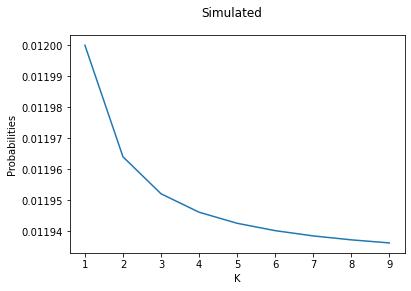

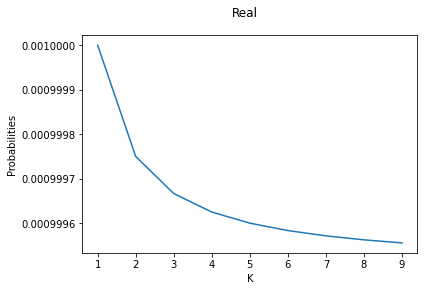

In [453]:
import matplotlib.pyplot as plt
l=list(range(1,10))
r=[]
for i in range (1,10):
    y=1-(1-(0.012/i))**i
    r.append(y)
plt.plot(l,r)
plt.ylabel("Probabilities")
plt.xlabel("K")
plt.suptitle('Simulated')
plt.show()

#Real
s=[]
for i in range (1,10):
    x=1-(1-(0.001/i))**i
    s.append(x)
plt.plot(l,s)
plt.ylabel("Probabilities")
plt.xlabel("K")
plt.suptitle('Real')
plt.show()

We see that the probabilities of atleast one accident in a mile for various K values above, and infer the following  things:-

1) We can infer that as we divide the mile into K- cutin scenarios, the probability of accident within that K-part decreases, as it should.

2) The simulation probability is more than the real-world probability. This could be due to the fact that real-world poses a lot of noise (in data) and challenges while recording accident details. Whereas, in the simulation data, accidents can be perfectly designed and hence can be statistically studied.



#### What are the pros and cons of simulation given the discrepancy between probability of accident in simulation and the real-world data? (1 point)

Even though there is discrepancy, the simulation gives us a rough estimate of the real-world conditions that helps us study and understand the design flaws in an AV.

1) Pros: In simulated data, there is an advantage of controllability and standardization. This basically means that we could manipulate the road layout, accident conditions, and weather conditions for the ideal situation that helps conduct in-depth studies. Also, there is no physical danger while simulating accidents, and one can safely experiment with various kind of fatal scenarios.

2) Cons:Insimulateddata,wecannot project the exact/accurate real-life conditions that might lead to an accident. It might be difficult for various groups of people (for example old people) to understand how a simulation works.

## Naive Bayes Model 

In [34]:
diseng = pd.read_csv('mp1_av_disengagements.csv',sep=',')

In [35]:
# replace the cause values with corresponding class label

diseng['Class'] = diseng['Cause']
diseng['Class'].replace(['Incorrect behavior prediction of others','Recklessly behaving agent','Unwanted Driver Discomfort'],'Controller',inplace=True)
diseng['Class'].replace(['Adverse road surface conditions','Emergency Vehicle','Position Estimation Failure','Incorrect Traffic Light Detection'],'Perception System',inplace=True)
diseng['Class'].replace(['System Tuning and Calibration','Hardware Fault','Software Froze'],'Computer System',inplace=True)
diseng.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System


Select only the required columns. Get class labels, feature names and their unique values from selected data. Then convert data to a list of values to be used for trianing and prediction

In [36]:
def get_values(data):
    colname = data.columns
    c_label = data[colname[-1]].unique()
    f_name  = colname[:-1]
    # create a dict of categorical values for each feature
    f_values = {}
    for f in f_name:
        f_values[f] = data[f].unique()
        
    return c_label,f_name,f_values

In [37]:
# get label names, feature names and their corresponding values

c_label,f_name,f_values = get_values(diseng[['Location','Weather','TypeOfTrigger','Class']])
data = diseng[['Location','Weather','TypeOfTrigger','Class']].values

#### Randomly Split the Data into train set (80%) and test set (20%)

In [38]:
# function that splits dataset into train and test data
def split(data,train_ratio):
    k = int(len(data) * train_ratio)
    # randomly shuffle the dataset
    np.random.shuffle(data)
    train, test = data[:k,:], data[k:,:]
    return train, test

In [40]:
train, test = split(data,0.8)
print("Size of Train Data: {0}".format(len(train)))
print("Size of Test Data: {0}".format(len(test)))

Size of Train Data: 819
Size of Test Data: 205


### TRAINING

Train a Naive Bayes model on the training data. The outputs are values of individual class probabilities and the conditional probabilities of categorical values of features



$$ p({C_k}) = \frac{{No.{\text{ }}of{\text{ }}diseng{\text{ }}with{\text{ }}{C_k}}}{{Total{\text{ }}No.{\text{ }}of{\text{ }}diseng}} $$


$$ p({x_i}|{C_k}) = \frac{{No.{\text{ }}of{\text{ }}{x_i}{\text{ }}in{\text{ }}{C_k}}}{{Total{\text{ }}No.{\text{ }}of{\text{ }}diseng{\text{ }}with{\text{ }}{C_k}}} $$

In [42]:
# function accepts the data values in the form of a list.

def train_NB(data,c_label,f_name,f_values):
    
    c_prob = {}
    f_prob = {}
    N = len(data)
    for label in c_label:
        # separate data values for class label
        separated   = data[data[:,-1]==label]
        Ns = len(separated)
        # calculate class probability
        c_prob[label] = Ns/N
        temp2 = {}
        for i, f in enumerate(f_name): # repeate the procedure for each feature
            # create a temporary dictionary
            temp1 = {}
            for val in f_values[f]:
                # calculate conditional probability
                #temp1[val] = sum(separated[f]==val)/Ns
                temp1[val] = round(sum(separated[:,i]==val)/Ns,4)  
            temp2[f]=temp1
        f_prob[label]=temp2
    # return a dict containing individual class probabilities
    # return a dict containing conditional probabilities of each categorical value
    return c_prob,f_prob

### Class Probabilities $ P(C_k) $

In [43]:
c_prob,f_prob = train_NB(train,c_label,f_name,f_values)
c_prob

{'Perception System': 0.358974358974359,
 'Computer System': 0.2869352869352869,
 'Controller': 0.3540903540903541}

### Categorical Feature Probabilities $ P(x_i|C_k) $

In [44]:
pd.DataFrame(f_prob)

,Perception System,Computer System,Controller
Location,"{'urban-street': 1.0, 'highway': 0.0}","{'urban-street': 0.9277, 'highway': 0.0723}","{'urban-street': 1.0, 'highway': 0.0}"
Weather,"{'cloudy': 1.0, 'clear': 0.0}","{'cloudy': 0.4, 'clear': 0.6}","{'cloudy': 0.9966, 'clear': 0.0034}"
TypeOfTrigger,"{'automatic': 0.8333, 'manual': 0.1667}","{'automatic': 0.4936, 'manual': 0.5064}","{'automatic': 0.1448, 'manual': 0.8552}"


### TESTING

Now test the trained model on test data. Predict the class with maximum conditional probability

Assumption:

$$p({x_i}|{x_{i + 1}},{x_{i + 2}},..,{x_n},{C_k}) = p({x_i}|{C_k})$$

$$ {C^*} = \mathop {\arg \max }\limits_{k \in \{ 1,...,K\} } p({C_k})\prod\limits_{i = 1}^n {p({x_i}|{C_k})} $$

In [45]:
def NB_pred(data,c_prob,f_prob,c_label,f_name,f_values):
    pred = []
    for row in data:  
        score = {}
        # calculate conditional probability for each class
        for c in c_label:
            CP = 1
            # calculate probability using Bayes Rule assuming that features are independent
            for i,f in enumerate(f_name):
                CP = CP*f_prob[c][f][row[i]]
            score[c]= CP*c_prob[c]
        # use MAP rule to get class label
        # select the class with maximum probability
        pred.append(max(score, key=score.get))
    return pred

### FUNCTION FOR CALCULATING ACCURACY

In [46]:
def get_accuracy(true,pred):
    accuracy = round(sum(true==pred)/len(true),4)
    return accuracy


In [47]:
pred = NB_pred(test,c_prob,f_prob,c_label,f_name,f_values)
accuracy = get_accuracy(test[:,-1], pred)
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.8195


### CROSS-VALIDATION

In [48]:
accuracy = []
for i in range(10):
    train, test = split(data, train_ratio=0.8)
    c_prob,f_prob = train_NB(train,c_label,f_name,f_values)
    pred = NB_pred(test,c_prob,f_prob,c_label,f_name,f_values)
    acc = get_accuracy(test[:,-1], pred)
    accuracy.append(acc)
avg_acc = round(np.mean(accuracy),4)
print("Accuracy List: {0}".format(accuracy))
print("Average Accuracy: {0}".format(avg_acc))

Accuracy List: [0.7756, 0.7805, 0.7707, 0.8098, 0.8244, 0.7902, 0.8098, 0.7707, 0.7561, 0.7659]
Average Accuracy: 0.7854
